In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

https://github.com/lukasgarbas/nlp-text-emotion/blob/master/bert.ipynb

In [3]:
dataset = pd.read_csv('Bhaav-Dataset.csv')

# https://www.analyticsvidhya.com/blog/2021/12/fine-tune-bert-model-for-sentiment-analysis-in-google-colab/

https://swatimeena989.medium.com/bert-text-classification-using-keras-903671e0207d

In [4]:
import pandas as pd
import numpy as np

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [6]:
dataset

,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1
...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1


In [7]:
dataset['Annotation'].value_counts()

4    11697
2     3168
1     2463
3     1512
0     1464
Name: Annotation, dtype: int64

In [8]:
dataset['Emotion'] = np.where(
    dataset['Annotation'] == 0, 'Anger', np.where(
        dataset['Annotation'] == 1, 'Joy', np.where(
            dataset['Annotation'] == 2, 'Sad', np.where(
                dataset['Annotation'] == 3, 'Suspense', 'Neutral'))))
dataset

,Sentences,Annotation,Emotion
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1,Joy
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1,Joy
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1,Joy
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1,Joy
4,गाँव में कितनी हलचल है,1,Joy
...,...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4,Neutral
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4,Neutral
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4,Neutral
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1,Joy


In [9]:
#dataset0=dataset.loc[dataset['Annotation'] == 0]
#dataset0

In [10]:
#dataset1=dataset.loc[dataset['Annotation'] == 1]
#dataset1

In [11]:
#dataset2=dataset.loc[dataset['Annotation'] == 2]
#dataset2

In [12]:
#dataset3=dataset.loc[dataset['Annotation'] == 3]
#dataset3

In [13]:
#dataset4=dataset.loc[dataset['Annotation'] == 4]
#dataset4

In [14]:
#dataset4_final=dataset4.sample(n = 3500)

In [15]:
#frames = [dataset0,dataset1,dataset2, dataset3, dataset4_final]

In [16]:
#dataset = pd.concat(frames)

In [17]:
#dataset

In [18]:
'''
full_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(dataset['Sentences'].values, tf.string),
            tf.cast(dataset['Annotation'].values, tf.int32)
        )
    )
)
'''

"\nfull_dataset = (\n    tf.data.Dataset.from_tensor_slices(\n        (\n            tf.cast(dataset['Sentences'].values, tf.string),\n            tf.cast(dataset['Annotation'].values, tf.int32)\n        )\n    )\n)\n"

In [19]:
#dataset["Sentences"] = dataset["Sentences"].str.replace('\u002C','')
#dataset["Sentences"] = dataset["Sentences"].str.replace('\u002D','')

In [20]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#hindi_stopwords = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
#vectorizer = TfidfVectorizer(stop_words=hindi_stopwords)
#tfidf = vectorizer.fit_transform(dataset["Sentences"])

In [21]:
#df1 = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

In [22]:
#dataset1 = pd.concat([dataset, df1], axis=1)
#dataset1

In [23]:
train_size = int(dataset.shape[0]*0.9)

In [24]:
dataset = dataset[['Sentences','Annotation']]

print(dataset.shape)
dataset

(20304, 2)


,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1
...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1


In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (18273, 2)
test shape:  (2031, 2)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['Sentences'], dataset['Annotation'], test_size=0.1)

In [27]:
class_names=list(set(y_train.values))
class_names
num_class_names=len(class_names)
num_class_names

5

In [28]:
!pip install -q transformers

     |████████████████████████████████| 4.0 MB 3.9 MB/s 
     |████████████████████████████████| 77 kB 3.7 MB/s 
     |████████████████████████████████| 6.6 MB 19.4 MB/s 
     |████████████████████████████████| 596 kB 32.8 MB/s 
     |████████████████████████████████| 895 kB 27.1 MB/s 


In [29]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import TFBertModel, BertConfig

In [30]:

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [31]:
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_class_names)

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
sent= 'how to train the model, lets look at how a trained model calculates its prediction.'

In [33]:
tokenized_sequence= bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =40,pad_to_max_length = True,
return_attention_mask = True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [34]:
tokenized_sequence

{'input_ids': [101, 14796, 10114, 17767, 10105, 13192, 117, 13595, 10107, 25157, 10160, 14796, 169, 33626, 13192, 87838, 26171, 10474, 78089, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [35]:
bert_tokenizer.decode(tokenized_sequence['input_ids'])

'[CLS] how to train the model, lets look at how a trained model calculates its prediction. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [36]:
sentences=dataset['Sentences']
labels=dataset['Annotation']
len(sentences),len(labels)

(20304, 20304)

In [37]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [38]:
len(input_ids),len(attention_masks),len(labels)

(20304, 20304, 20304)

In [39]:
import pickle
print('Preparing the pickle file.....')
path='/content/sample_data'

pickle_inp_path='bert_inp.pkl'
pickle_mask_path='bert_mask.pkl'
pickle_label_path='bert_label.pkl'


pickle.dump((input_ids),open(path+pickle_inp_path,'wb'))
pickle.dump((attention_masks),open(path+pickle_mask_path,'wb'))
pickle.dump((labels),open(path+pickle_label_path,'wb'))


print('Pickle files saved as ',pickle_inp_path,pickle_mask_path,pickle_label_path)

Preparing the pickle file.....
Pickle files saved as  bert_inp.pkl bert_mask.pkl bert_label.pkl


In [40]:
print('Loading the saved pickle files..')

input_ids=pickle.load(open(path+pickle_inp_path, 'rb'))
attention_masks=pickle.load(open(path+pickle_mask_path, 'rb'))
labels=pickle.load(open(path+pickle_label_path, 'rb'))

print('Input shape {} Attention mask shape {} Input label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Loading the saved pickle files..
Input shape (20304, 64) Attention mask shape (20304, 64) Input label shape (20304,)


In [41]:
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.1)


In [42]:
train_inp.shape

(18273, 64)

In [43]:
val_inp.shape

(2031, 64)

In [44]:
train_label.shape

(18273,)

In [45]:
val_label.shape

(2031,)

In [46]:
train_mask.shape

(18273, 64)

In [47]:
val_mask.shape

(2031, 64)

In [48]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Model
import keras.backend as K
from keras.models import load_model
log_dir='tensorboard_data/tb_bert'

model_save_path='bert_model.h5'
#callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True),keras.callbacks.TensorBoard(log_dir=log_dir)]
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True)]

In [49]:
pip install -q tf-models-official==2.4.0

     |████████████████████████████████| 1.1 MB 4.3 MB/s 
     |████████████████████████████████| 99 kB 8.8 MB/s 
     |████████████████████████████████| 352 kB 49.1 MB/s 
     |████████████████████████████████| 47.8 MB 1.7 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.1 MB 34.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.5 MB/s 
     |████████████████████████████████| 237 kB 47.6 MB/s 
     |████████████████████████████████| 462 kB 51.9 MB/s 


In [50]:
from official import nlp
from official.nlp import bert
import official.nlp.optimization

print('\nBert Model',bert_model.summary())
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

epochs = 10
batch_size = 32
eval_batch_size = 32

train_data_size = len(train_label)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)
#optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  177853440 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 177,857,285
Trainable params: 177,857,285
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [51]:
history=bert_model.fit([train_inp,train_mask],train_label,batch_size=32,epochs=10,validation_data=([val_inp,val_mask],val_label),callbacks=callbacks)
#history=bert_model.fit([train_inp,train_mask],train_label,batch_size=32,epochs=4,validation_data=([val_inp,val_mask],val_label))

Epoch 1/10
572/572 [==============================] - 563s 930ms/step - loss: 1.2886 - accuracy: 0.5501 - val_loss: 1.2183 - val_accuracy: 0.5746
Epoch 2/10
572/572 [==============================] - 528s 923ms/step - loss: 1.1799 - accuracy: 0.5776 - val_loss: 1.1909 - val_accuracy: 0.5795
Epoch 3/10
572/572 [==============================] - 527s 921ms/step - loss: 1.0643 - accuracy: 0.6015 - val_loss: 1.1375 - val_accuracy: 0.5854
Epoch 4/10
572/572 [==============================] - 524s 916ms/step - loss: 0.9394 - accuracy: 0.6446 - val_loss: 1.1779 - val_accuracy: 0.5682
Epoch 5/10
572/572 [==============================] - 524s 916ms/step - loss: 0.8187 - accuracy: 0.6953 - val_loss: 1.2373 - val_accuracy: 0.5554
Epoch 6/10
572/572 [==============================] - 524s 916ms/step - loss: 0.7058 - accuracy: 0.7440 - val_loss: 1.2985 - val_accuracy: 0.5756
Epoch 7/10
572/572 [==============================] - 524s 916ms/step - loss: 0.5978 - accuracy: 0.7848 - val_loss: 1.4084 -

In [52]:
model_save_path='bert_model.h5'


In [53]:
trained_model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=5)
trained_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
trained_model.load_weights(model_save_path)



All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
preds = trained_model.predict([val_inp,val_mask],batch_size=32)

In [ ]:
print(preds)

In [ ]:
pred_labels = np.argmax(preds.logits, axis=1)

In [ ]:
print(pred_labels)

In [58]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [59]:
print(len(pred_labels))

2031


In [60]:
f1 = f1_score(val_label,pred_labels,average="weighted")
print('F1 score',f1)

F1 score 0.5286983845299418


In [61]:
print('Classification Report')
print(classification_report(val_label,pred_labels))

Classification Report
              precision    recall  f1-score   support

           0       0.29      0.17      0.22       138
           1       0.43      0.17      0.24       260
           2       0.41      0.24      0.30       304
           3       0.43      0.11      0.18       162
           4       0.63      0.88      0.74      1167

    accuracy                           0.59      2031
   macro avg       0.44      0.31      0.33      2031
weighted avg       0.53      0.59      0.53      2031



In [62]:
print('Training and saving built model.....')  

Training and saving built model.....


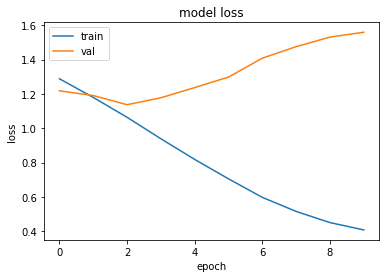

In [63]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()